**Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

**Definition of a functions object**

In [3]:
class ObjecFunc:
    def __init__(self, numComponents, a : list = None):
        self.n = numComponents
        if a is None:
            self.a = [i for i in range(1,self.n+1)]
        else: 
            self.a = list(a)
    
    def opt(self): 
        # Point for which the minimum of the objective function is reached
        return np.mean(self.a)
    
    def evaluate(self,x):
        val = x*np.ones(self.n)
        val = val-np.array(self.a)
        val = val**2
        return np.mean(val)
    
    def evaluate_vector(self, x):
        x = np.array(x).reshape(1,-1)
        mat = np.repeat(x.T,len(x), axis=1)
        mat = mat - np.repeat(self.a, len(x), axis = 0)
        mat = mat**2
        return np.mean(mat, axis = 1)
    
    def grad(self,x):
        return np.mean(2*(np.ones(self.n)*x - np.array(self.a)))
    
    def stochGrad(self,x):
        i = np.random.randint(self.n)
        return 2*(x-self.a[i])

**Definition of GD/SGD functions**

In [4]:
# Gradient descent stops after numIters iterations

def GDiters(F : ObjecFunc, numIters, lr : 0.001 , x0 = 200): 
    """
    Returns:
        x : 200th term of GD sequence
        np.array(t) : t[n] -> after n iteration
    """
    x = [x0]
    xPrev = x0
    t = [0]
    ti = time()
    for _ in range(numIters-1):
        xNew = xPrev - lr*F.grad(xPrev)
        xPrev = xNew
        x.append(xNew)
        t.append(time()-ti)
    return x,np.array(t)

def SGDiters(F : ObjecFunc, numIters, lr = 0.001, x0=200):
    """
    Returns:
        x : 200th term of GD sequence
        np.array(t) : t[n] -> after n iteration
    """
    x = [x0]
    xPrev = x0
    t = [0]
    ti = time()
    for _ in range(numIters-1):
        xNew = xPrev - lr*F.stochGrad(xPrev)
        xPrev = xNew
        x.append(xNew)
        t.append(time()-ti)
    return x,np.array(t)    

In [5]:
# Gradient descent stops after tMax seconds

def GD(F,tMax, lr, x0=200):
    x = [x0]
    xPrev = x0
    t = [0]
    ti = time()
    continueGD = True
    while continueGD:
        xNew = xPrev - lr*F.grad(xPrev)
        xPrev = xNew
        x.append(xNew)
        t.append(time()-ti)
        continueGD = t[-1]<tMax
    return x,np.array(t)

def SGD(F : ObjecFunc,tMax, lr, x0=200):
    x = [x0]
    xPrev = x0
    t = [0]
    ti = time()
    continueSGD = True
    while continueSGD:
        xNew = xPrev - lr*F.stochGrad(xPrev)
        xPrev = xNew
        x.append(xNew)
        t.append(time()-ti)
        continueSGD = t[-1]<tMax
    return x,np.array(t)

def SGD_decr(F, tMax, lr, x0=200):
    x = [x0]
    xPrev = x0
    t = [0]
    ti = time()
    continueSGD = True
    n = 0
    while continueSGD:
        xNew = xPrev - lr/np.sqrt(n+1)*F.stochGrad(xPrev)
        xPrev = xNew
        x.append(xNew)
        t.append(time()-ti)
        continueSGD = t[-1]<tMax
        n+=1
    return x,np.array(t)

**Exemple 1** : $f(x) = \frac{1}{n}\sum_{k = 1}^{n} (x-k)^2$

time GD =  10.339021682739258 (ms), numIters =  13
time SGD =  10.001897811889648 (ms), numIters =  3267
time SGD decreasing stepsize=  10.011911392211914 (ms), numIters =  4057


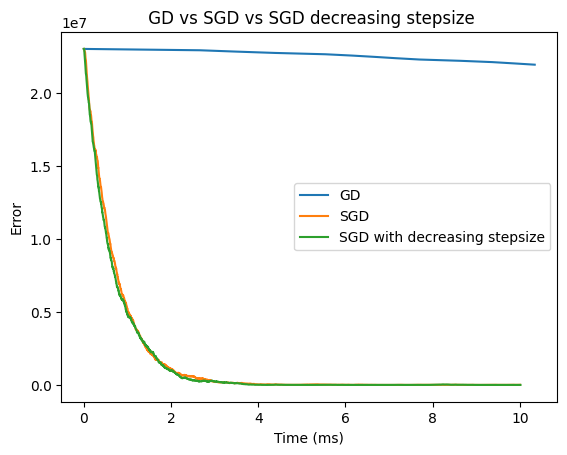

In [132]:
#----- Parameters -----
F = ObjecFunc(10_000)
p_time = 0.01 #en secondes
lr = 0.001

#----- Execution -----
x_GD, time_GD = GD(F,p_time,lr)
x_SGD, time_SGD = SGD(F,p_time,lr)
x_SGD_decr, time_SGD_decr = SGD(F,p_time,lr)

print("time GD = ",time_GD[-1]*1000,"(ms), numIters = ",len(x_GD))
print("time SGD = ",time_SGD[-1]*1000,"(ms), numIters = ",len(x_SGD))
print("time SGD decreasing stepsize= ",time_SGD_decr[-1]*1000,"(ms), numIters = ",len(x_SGD_decr))

val_GD = F.evaluate_vector(x_GD)
val_SGD = F.evaluate_vector(x_SGD)
val_SGD_decr = F.evaluate_vector(x_SGD_decr)

minF = F.evaluate(F.opt())

#----- Representation -----

plt.plot(time_GD*1000, val_GD-minF, label = 'GD')
plt.plot(time_SGD*1000, val_SGD-minF, label = 'SGD')
plt.plot(time_SGD_decr*1000, val_SGD_decr-minF, label = 'SGD with decreasing stepsize')
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.title(' GD vs SGD vs SGD decreasing stepsize')
plt.legend()


plt.show()


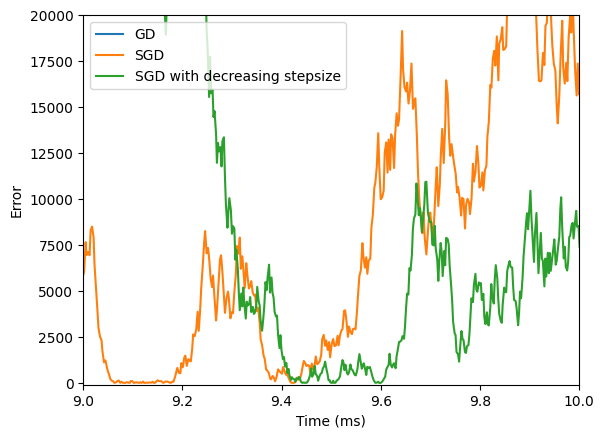

In [102]:
plt.plot(time_GD*1000, val_GD-minF, label = 'GD')
plt.plot(time_SGD*1000, val_SGD-minF, label = 'SGD')
plt.plot(time_SGD_decr*1000, val_SGD_decr-minF, label = 'SGD with decreasing stepsize')
plt.legend()
plt.xlim(9,10)
plt.ylim(-100,20_000)
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.show()


time GD =  1738.7850284576416 (ms), numIters =  4000
time SGD =  11.410951614379883 (ms), numIters =  4000


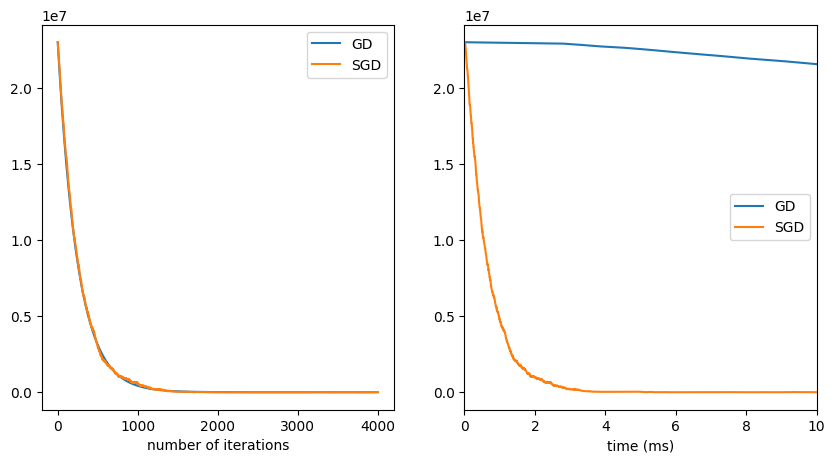

In [150]:
#----- Parameters -----
F = ObjecFunc(10_000)
niters = 4_000
lr = 0.001

#----- Execution ------
xGD, tGD = GDiters(F,niters,lr)
print("time GD = ",tGD[-1]*1000,"(ms), numIters = ",len(xGD))

xSGD, tSGD = SGDiters(F,niters,lr)
print("time SGD = ",tSGD[-1]*1000,"(ms), numIters = ",len(xSGD))

valGD = F.evaluate_vector(xGD)
valSGD = F.evaluate_vector(xSGD)

minF = F.evaluate(F.opt())

#----- Plot ------

plt.figure(figsize=(10,5))
#plt.title('test')

plt.subplot(1,2,1)
plt.plot(np.arange(1,niters+1), valGD-minF, label = 'GD')
plt.plot(np.arange(1,niters+1), valSGD-minF, label = 'SGD')
plt.xlabel('number of iterations')
plt.title(label='')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tGD*1000, valGD-minF, label = 'GD')
plt.plot(tSGD*1000, valSGD-minF, label = 'SGD')
plt.xlabel('time (ms)')
plt.xlim((0,10))
#plt.yscale('log')
plt.legend()


plt.show()


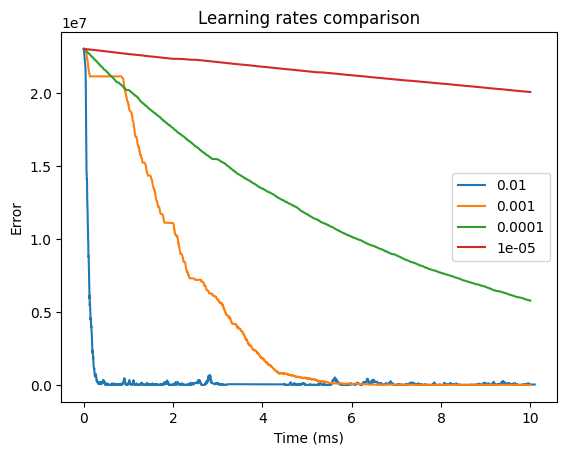

In [10]:
#----- Parameters -----
n_functions = 10_000
F = ObjecFunc(n_functions)
p_time = 0.01 #en secondes
lr1 = 0.01
lr2 = 0.001
lr3 = 0.0001
lr4 = 0.00001

#----- Execution -----
x_SGD1, time_SGD1 = SGD(F,p_time,lr1)
x_SGD2, time_SGD2 = SGD(F,p_time,lr2)
x_SGD3, time_SGD3 = SGD(F,p_time,lr3)
x_SGD4, time_SGD4 = SGD(F,p_time,lr4)

val_SGD1 = F.evaluate_vector(x_SGD1)
val_SGD2 = F.evaluate_vector(x_SGD2)
val_SGD3 = F.evaluate_vector(x_SGD3)
val_SGD4 = F.evaluate_vector(x_SGD4)

minF = F.evaluate(F.opt())

#----- Representation -----


plt.plot(time_SGD1*1000, val_SGD1-minF, label = f'{lr1}')
plt.plot(time_SGD2*1000, val_SGD2-minF, label = f'{lr2}')
plt.plot(time_SGD3*1000, val_SGD3-minF, label = f'{lr3}')
plt.plot(time_SGD4*1000, val_SGD4-minF, label = f'{lr4}')
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.title('Learning rates comparison')
plt.legend()
#plt.yscale('log')
plt.show()

In [33]:

plt.plot(time_SGD1*1000, val_SGD1-minF, label = f'{lr1}')
plt.plot(time_SGD2*1000, val_SGD2-minF, label = f'{lr2}')
plt.plot(time_SGD3*1000, val_SGD3-minF, label = f'{lr3}')
plt.plot(time_SGD4*1000, val_SGD4-minF, label = f'{lr4}')
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.title('Learning rates comparison')
plt.legend()
plt.yscale('log')
plt.show()

NameError: name 'time_SGD1' is not defined

__Exemple 2__ : $f(x) = \frac{1}{n}\sum_{i = 1}^{n} (x-\frac{1}{i})^2$

time GD =  10.010004043579102 (ms), numIters =  17
time SGD =  10.001897811889648 (ms), numIters =  3173
time SGD decreasing stepsize=  10.001182556152344 (ms), numIters =  3734


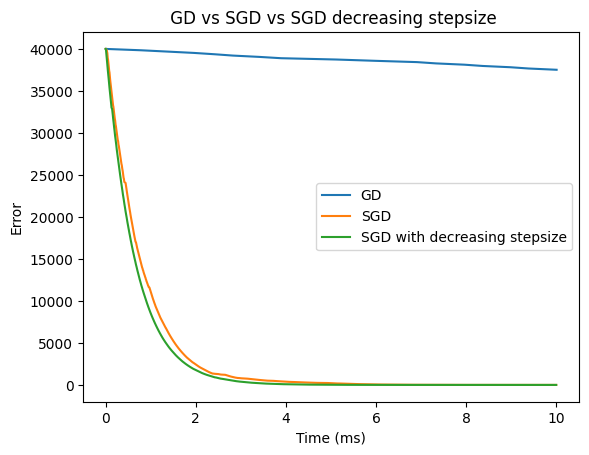

In [16]:
#----- Parameters -----
n_functions = 10_000
F = ObjecFunc(n_functions, a = 1/np.arange(1,n_functions+1))
p_time = 0.01 #en secondes
lr = 0.001

#----- Execution -----
x_GD, time_GD = GD(F,p_time,lr)
x_SGD, time_SGD = SGD(F,p_time,lr)
x_SGD_decr, time_SGD_decr = SGD(F,p_time,lr)

print("time GD = ",time_GD[-1]*1000,"(ms), numIters = ",len(x_GD))
print("time SGD = ",time_SGD[-1]*1000,"(ms), numIters = ",len(x_SGD))
print("time SGD decreasing stepsize= ",time_SGD_decr[-1]*1000,"(ms), numIters = ",len(x_SGD_decr))

val_GD = F.evaluate_vector(x_GD)
val_SGD = F.evaluate_vector(x_SGD)
val_SGD_decr = F.evaluate_vector(x_SGD_decr)

minF = F.evaluate(F.opt())

#----- Representation -----

plt.plot(time_GD*1000, val_GD-minF, label = 'GD')
plt.plot(time_SGD*1000, val_SGD-minF, label = 'SGD')
plt.plot(time_SGD_decr*1000, val_SGD_decr-minF, label = 'SGD with decreasing stepsize')
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.title(' GD vs SGD vs SGD decreasing stepsize')
plt.legend()
#plt.yscale('log')
plt.show()

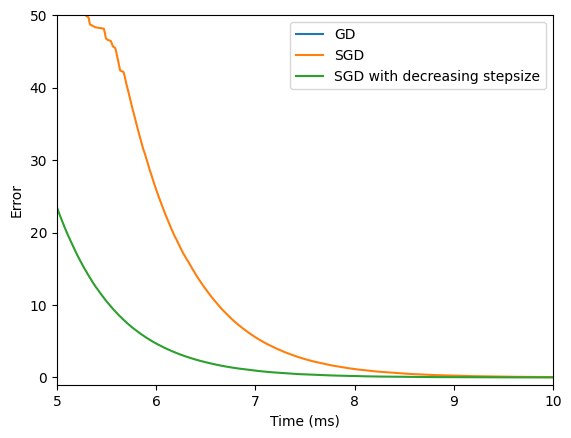

In [210]:
plt.plot(time_GD*1000, val_GD-minF, label = 'GD')
plt.plot(time_SGD*1000, val_SGD-minF, label = 'SGD')
plt.plot(time_SGD_decr*1000, val_SGD_decr-minF, label = 'SGD with decreasing stepsize')
plt.legend()
plt.xlim(5,10)
plt.ylim(-1,50)
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.show()


time GD =  849.5900630950928 (ms), numIters =  2000
time SGD =  5.3539276123046875 (ms), numIters =  2000


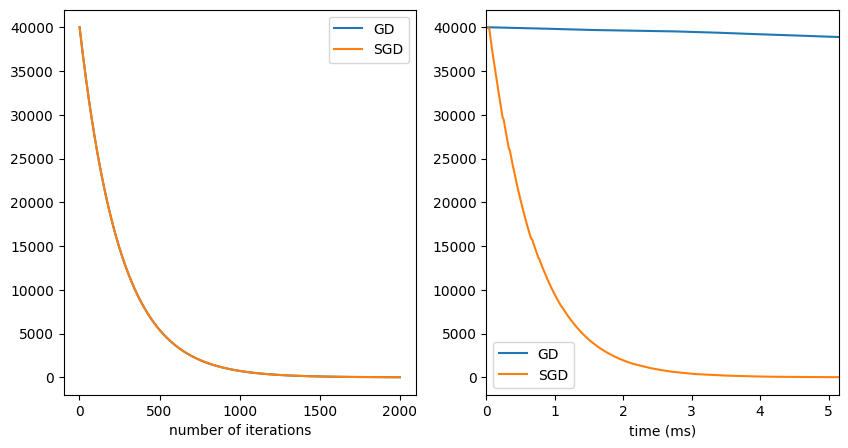

In [185]:
#----- Parameters -----
n_functions = 10_000
F = ObjecFunc(n_functions, a = 1/np.arange(1,n_functions+1))
niters = 2_000
lr = 0.001

#----- Execution ------
xGD, tGD = GDiters(F,niters,lr)
print("time GD = ",tGD[-1]*1000,"(ms), numIters = ",len(xGD))

xSGD, tSGD = SGDiters(F,niters,lr)
print("time SGD = ",tSGD[-1]*1000,"(ms), numIters = ",len(xSGD))

valGD = F.evaluate_vector(xGD)
valSGD = F.evaluate_vector(xSGD)

minF = F.evaluate(F.opt())

#----- Plot ------

plt.figure(figsize=(10,5))
#plt.title('test')

plt.subplot(1,2,1)
plt.plot(np.arange(1,niters+1), valGD-minF, label = 'GD')
plt.plot(np.arange(1,niters+1), valSGD-minF, label = 'SGD')
plt.xlabel('number of iterations')
plt.title(label='')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tGD*1000, valGD-minF, label = 'GD')
plt.plot(tSGD*1000, valSGD-minF, label = 'SGD')
plt.xlabel('time (ms)')
plt.xlim((-0,5.145788192749023))
plt.legend()


plt.show()


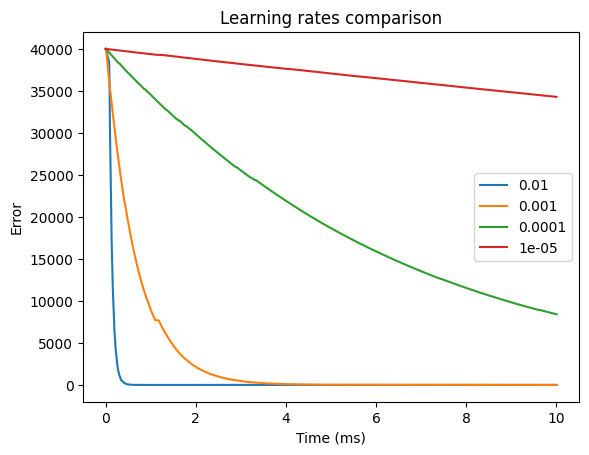

In [183]:
#----- Parameters -----
n_functions = 10_000
F = ObjecFunc(n_functions, a = 1/np.arange(1,n_functions+1))
p_time = 0.01 #en secondes
lr1 = 0.01
lr2 = 0.001
lr3 = 0.0001
lr4 = 0.00001

#----- Execution -----
x_SGD1, time_SGD1 = SGD(F,p_time,lr1)
x_SGD2, time_SGD2 = SGD(F,p_time,lr2)
x_SGD3, time_SGD3 = SGD(F,p_time,lr3)
x_SGD4, time_SGD4 = SGD(F,p_time,lr4)

val_SGD1 = F.evaluate_vector(x_SGD1)
val_SGD2 = F.evaluate_vector(x_SGD2)
val_SGD3 = F.evaluate_vector(x_SGD3)
val_SGD4 = F.evaluate_vector(x_SGD4)

minF = F.evaluate(F.opt())

#----- Representation -----


plt.plot(time_SGD1*1000, val_SGD1-minF, label = f'{lr1}')
plt.plot(time_SGD2*1000, val_SGD2-minF, label = f'{lr2}')
plt.plot(time_SGD3*1000, val_SGD3-minF, label = f'{lr3}')
plt.plot(time_SGD4*1000, val_SGD4-minF, label = f'{lr4}')
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.title('Learning rates comparison')
plt.legend()
#plt.yscale('log')
plt.show()

__Exemple 2__ : $f(x) = \frac{1}{n}\sum_{i = 1}^{n} (x-i^2)^2$

time GD =  5000.915765762329 (ms), numIters =  2495
time SGD =  5000.0 (ms), numIters =  1838897
time SGD decreasing stepsize=  5000.0 (ms), numIters =  1815473


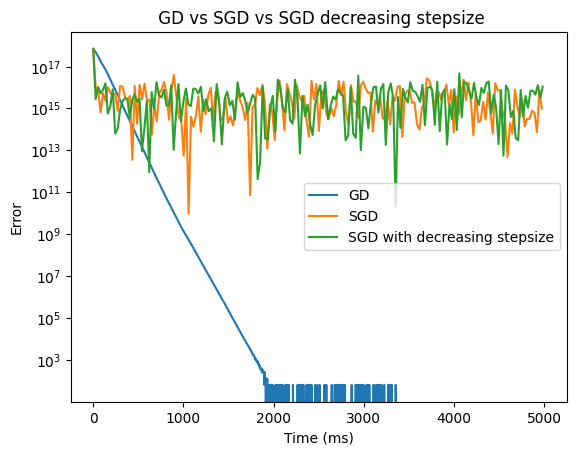

In [32]:
#----- Parameters -----
n_functions = 50_000
F = ObjecFunc(n_functions, a = np.arange(1,n_functions+1)**2)
p_time = 5 #en secondes
lr = 0.01
n = 10000

#----- Execution -----
x_GD, time_GD = GD(F,p_time,lr)
x_SGD, time_SGD = SGD(F,p_time,0.01)
x_SGD_decr, time_SGD_decr = SGD(F,p_time,0.01)

print("time GD = ",time_GD[-1]*1000,"(ms), numIters = ",len(x_GD))
print("time SGD = ",time_SGD[-1]*1000,"(ms), numIters = ",len(x_SGD))
print("time SGD decreasing stepsize= ",time_SGD_decr[-1]*1000,"(ms), numIters = ",len(x_SGD_decr))

val_GD = F.evaluate_vector(x_GD)
val_SGD = F.evaluate_vector(x_SGD[::n])
val_SGD_decr = F.evaluate_vector(x_SGD_decr[::n])

minF = F.evaluate(F.opt())

#----- Representation -----

plt.plot(time_GD*1000, val_GD-minF, label = 'GD')
plt.plot(time_SGD[::n]*1000, val_SGD-minF, label = 'SGD')
plt.plot(time_SGD_decr[::n]*1000, val_SGD_decr-minF, label = 'SGD with decreasing stepsize')
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.title(' GD vs SGD vs SGD decreasing stepsize')
plt.legend()
plt.yscale('log')
plt.show()

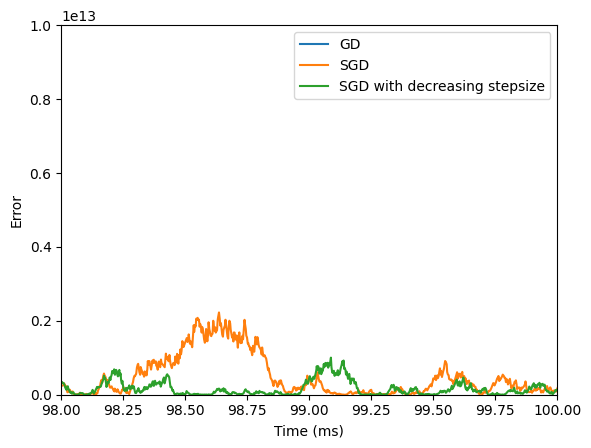

In [26]:
plt.plot(time_GD*1000, val_GD-minF, label = 'GD')
plt.plot(time_SGD*1000, val_SGD-minF, label = 'SGD')
plt.plot(time_SGD_decr*1000, val_SGD_decr-minF, label = 'SGD with decreasing stepsize')
plt.legend()
plt.xlim(98,100)
plt.ylim(-1,0.1*1e14)
plt.xlabel('Time (ms)')
plt.ylabel('Error')
plt.show()